In [2]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

**SF Temperature**

In [39]:
# getting our data
df = data.sf_temps()


In [40]:
# checking the data types of our variables
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

- Resample by the day and take the average temperature. Visualize the average temperature over time

In [41]:
# setting date as index

df = df.set_index('date').sort_index()

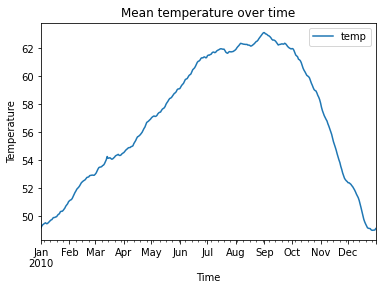

In [42]:
# resampling the data by Days and getting the mean temperature and plotting it to vizualize the mean temperature
# over time

df.resample('D').mean().plot()

plt.title("Mean temperature over time")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

- Write the code necessary to visualize the minimum temperature over time.

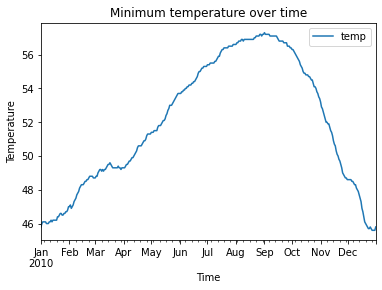

In [43]:
# resampling the data by Days and getting the minimum temperature and plotting it to vizualize the minimum temperature
# over time


df.resample('D').min().plot()
plt.title("Minimum temperature over time")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

- Write the code necessary to visualize the maximum temperature over time.

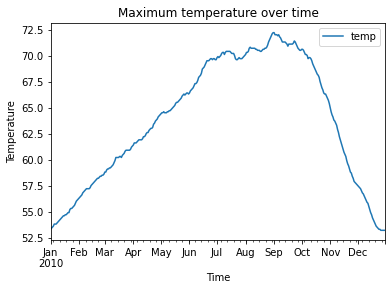

In [44]:
# resampling the data by Days and getting the maximum temperature and plotting it to vizualize the maximum temperature
# over time


df.resample('D').max().plot()
plt.title("Maximum temperature over time")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


- Which month is the coldest, on average?

In [45]:
# resampling the data by the start of the month then getting the mean, and sorting it to get the month with the
# lowest temp on top

df.resample('MS').mean().sort_values(by = 'temp')

,temp
date,
2010-01-01,49.984140
2010-12-01,50.498253
2010-02-01,52.243899
2010-03-01,53.956528
2010-11-01,55.185139
2010-04-01,55.633056
2010-05-01,57.970968
2010-10-01,60.253091
2010-06-01,60.444722


- Which month has the highest average temperature?

In [46]:
# resampling the data by the start of the month then getting the mean, and sorting it to get the month with the
# highest temp on top


df.resample('MS').mean().sort_values(by = 'temp', ascending = False)

,temp
date,
2010-09-01,62.487083
2010-08-01,62.405376
2010-07-01,61.765457
2010-06-01,60.444722
2010-10-01,60.253091
2010-05-01,57.970968
2010-04-01,55.633056
2010-11-01,55.185139
2010-03-01,53.956528


- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [47]:
# resampling the data by Day and then aggregating to get the min and max temperature for each day

df_min_max = df.resample('D')['temp'].agg(['min', 'max'])



In [48]:
# creating a new column named variability and storing the difference of minimum and maximum temperature for that day
# into that column

df_min_max['variability'] = df_min_max['max'] - df_min_max['min']

In [49]:
# resampling the data by month and then getting the variability mean to get the month with highest variablity

df_min_max.resample('M')['variability'].mean().sort_values(ascending = False).head(1)

date
2010-09-30    14.403333
Name: variability, dtype: float64

- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

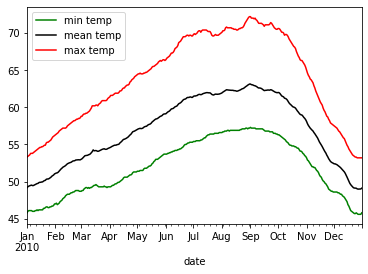

In [62]:
# one way to do it

df.resample('D').temp.min().plot(c = 'green', label = 'min temp')
df.resample('D').temp.mean().plot(c = 'black', label = 'mean temp')
df.resample('D').temp.max().plot(c = 'red', label = 'max temp')
plt.legend()
plt.show()

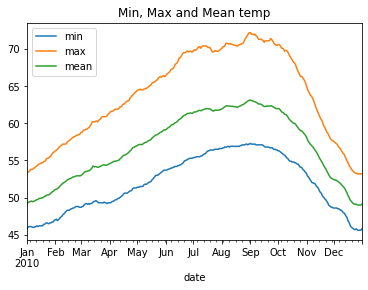

In [66]:
# another way to do it

df.temp.resample('D').agg(['min', 'max', 'mean']).plot()
plt.title('Min, Max and Mean temp')
plt.show()

**Seattle Weather**

- Which year and month combination has the highest amount of precipitation?

In [15]:
# getting the data

weather = data.seattle_weather()


# setting date as the index of the dataframe


weather_df = weather.set_index('date').sort_index()

In [16]:
# resampling the data by the start of the month and getting the max and sorting by precipitation to get the 
# month with highest precipitation value


weather_df.resample('MS').max().sort_values(by = 'precipitation', ascending = False).head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-01,55.9,20.6,10.6,5.7,sun


- Visualize the amount of monthly precipitation over time.

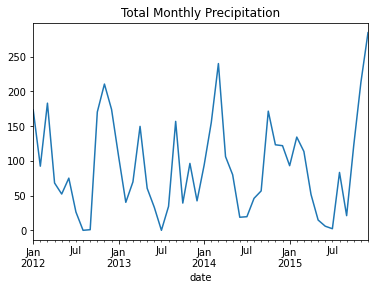

In [17]:
# resampling the data by month and summing the precipitation for the month and vizualizing it

weather_df.resample('M').precipitation.sum().plot()
plt.title('Total Monthly Precipitation')
plt.show()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

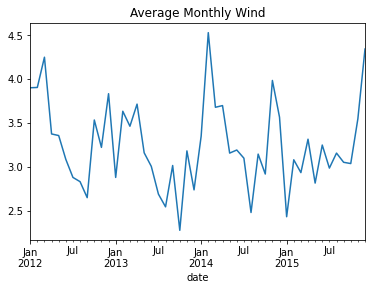

In [18]:
# resampling the data by month and getting the average wind for the month and vizualizing it

weather_df.resample('M').wind.mean().plot()
plt.title("Average Monthly Wind")
plt.show()

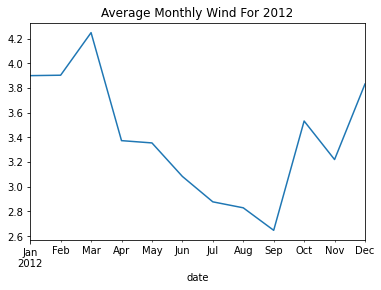

In [67]:
# lets just pick a year time frame and get the mean wind and plot it

weather_df['2012/1/1':'2012/12/31'].resample('M').wind.mean().plot()
plt.title("Average Monthly Wind For 2012")
plt.show()

- Which year-month combination is the windiest?

In [68]:
# resample our data by start of the month, select wind, and get the mean and sort it in descending order to
# get the highest on top

weather_df.resample('MS').wind.mean().sort_values( ascending = False).head(1)

date
2014-02-01    4.528571
Name: wind, dtype: float64

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [69]:
# getting only the data where the weather is sun and then resampling by year, and selecting the weather and doing value count
# then sorting in ascending order to get the highest count on top

weather_df[weather_df.weather == 'sun'].resample('Y').weather.value_counts().sort_values(ascending = False).head(1)

date        weather
2014-12-31  sun        211
Name: weather, dtype: int64

- In which month does it rain the most?

In [70]:
# grouping by the month from the index then getting the sum of precipitation and sorting to get the highest value

weather_df.groupby([weather_df.index.month], as_index = True).precipitation.sum().sort_values(ascending = False)

date
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of precipitation?

In [71]:
# getting data where the precipitation value is non zero then indexing the month and getting value counts

rainy_days=  weather_df[weather_df.precipitation != 0]

rainy_days.index.strftime("%B").value_counts()
# print(f'the month with most non zero days of rain is: {rainy_days.index.strftime("%B").value_counts().head(1)}')


December     81
March        73
February     73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: date, dtype: int64

### Flights Data

In [80]:
# importing data

flights_df = data.flights_20k()

In [81]:
# checking the dataframe
flights_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [82]:
# lets look at the datatypes
flights_df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

**Convert any negative delays to 0.**
- there are many ways to solve this
- can use np.where, pandas' df.where and df.loc
- we will use pandas df.where

In [83]:
# replacing the value less than 0 with 0

flights_df.delay.where(flights_df.delay> 0, 0, inplace = True)

In [84]:
# setting datetime as index

flight_df = flights_df.set_index('date').sort_index()

- Which hour of the day has the highest average delay?

In [85]:
# grouping the dataframe by hour of the day and then getting the mean of the delay time and sorting the value in 
# descending order to get the highest mean on top

flight_df.groupby([flight_df.index.hour], as_index = True).delay.mean().sort_values(ascending = False).head(1)

date
3    302.5
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [86]:
# adding the day of the week to the dataframe

flight_df['day'] = flight_df.index.day_name()
flight_df

,delay,distance,origin,destination,day
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,Saturday
2001-03-31 21:05:00,0,318,FLL,JAX,Saturday
2001-03-31 21:05:00,0,451,MCI,IND,Saturday


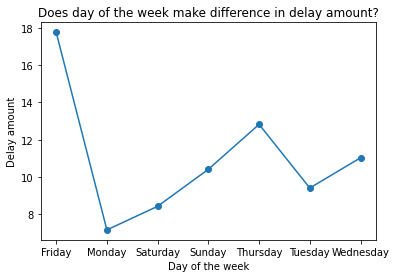

In [87]:
# grouping by the day of the week and then getting the mean delay time for each day and plotting it

flight_df.groupby('day').delay.mean().plot(marker = 'o')
plt.title("Does day of the week make difference in delay amount?")
plt.xlabel('Day of the week')
plt.ylabel('Delay amount')
plt.show()

- Does the month make a difference in the delay amount?

In [90]:
# adding the month of the year to the dataframe

flight_df['Month'] = flight_df.index.month_name()

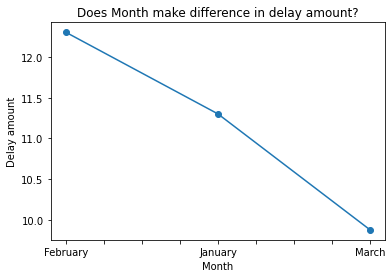

In [91]:
# grouping by the month and then getting the mean delay time and then plotting it

flight_df.groupby('Month').delay.mean().plot(marker = 'o')
plt.title("Does Month make difference in delay amount?")
plt.xlabel('Month')
plt.ylabel('Delay amount')
plt.show()

**Bonus Iowa Electricity**

In [ ]:
# lets get our data
iowa = data.iowa_electricity()

In [ ]:
# lets take a look at the dataframe
iowa.head(5)

In [ ]:
# lets check the data types
iowa.dtypes

- For each row, calculate the percentage of the year's total that energy source provided.

In [ ]:
iowa = iowa.set_index('year').sort_index()

In [ ]:
iowa.resample("Y").net_generation.sum()

In [ ]:
iowa.groupby([iowa.index.year], as_index = True).net_generation.sum()

In [ ]:
iowa.pivot_table